In [1]:
import cv2
import numpy as np
img = cv2.imread("Fig1004(b)(turbine_blade_black_dot).tif",0)
cv2.imshow("original_image",img)
#kernel for isolatd point detection
kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
img = cv2.filter2D(img,-1,kernel)
cv2.imshow("laplaican_result",img)
thresh,img= cv2.threshold(img,150,255,cv2.THRESH_BINARY)
cv2.imshow("threshlod_result",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import numpy as np
import cv2


def laplacian(img, kernel):
    row, col = img.shape[:2]
    r, c = kernel.shape[0] // 2, kernel.shape[1] // 2
    img_pad = np.pad(img, ((r, r), (c, c)), mode='constant', constant_values=0)
    
    lap_img = np.zeros(img.shape)
    for i in range(row):
        for j in range(col):
            roi = img_pad[i:i + kernel.shape[0], j:j + kernel.shape[1]]
            lap_img[i, j] = np.sum(kernel * roi)
    
    return lap_img


img = cv2.imread("Fig1004(b)(turbine_blade_black_dot).tif", 0)


kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])


laplacian_img = laplacian(img, kernel)


max_val = np.max(np.abs(laplacian_img))
threshold_value = 0.9 * max_val


_, thresh_img = cv2.threshold(laplacian_img, threshold_value, 255, cv2.THRESH_BINARY)


laplacian_img = np.clip(laplacian_img, 0, 255).astype('uint8')
thresh_img = thresh_img.astype('uint8')
dilated_img = cv2.dilate(thresh_img, kernel, iterations=1)
cv2.imshow("original_image", img)
cv2.imshow('laplaican_result', laplacian_img)
cv2.imshow("threshold_result", thresh_img)
cv2.imshow('point_detection',dilated_img)

cv2.waitKey(0)
cv2.destroyAllWindows()


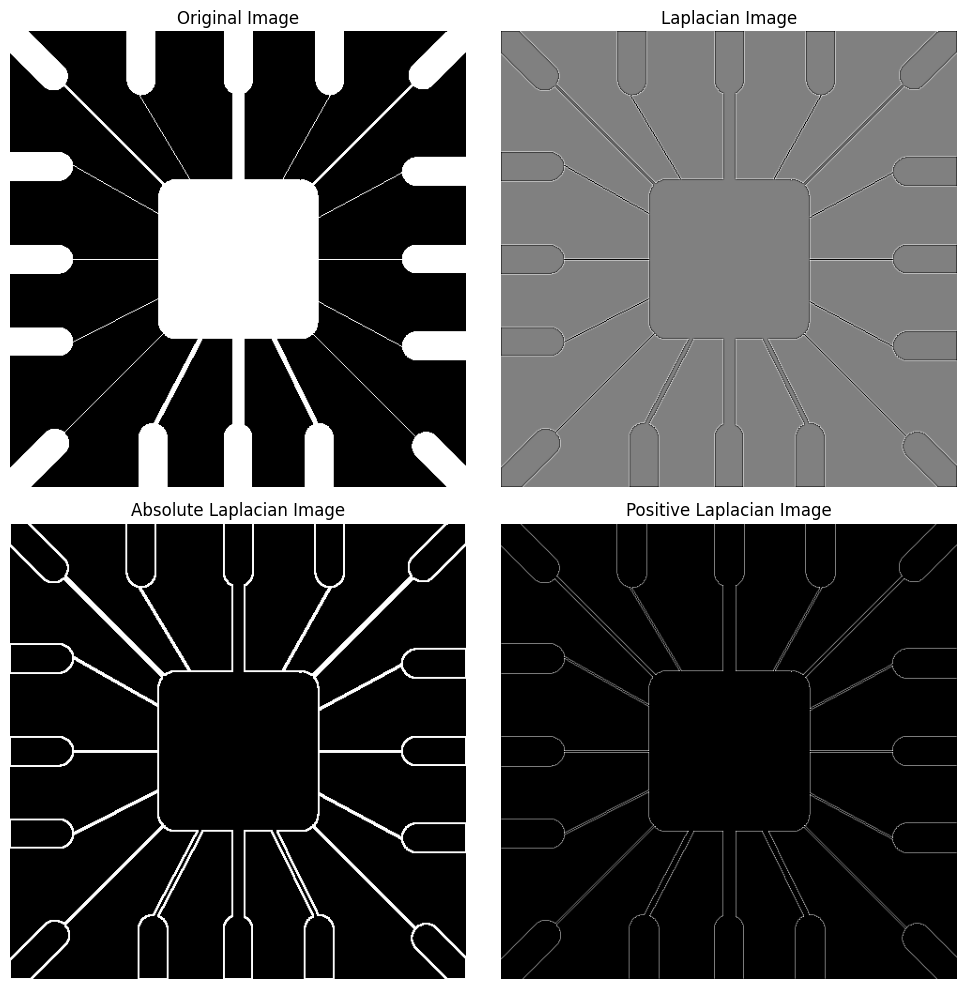

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Laplacian
def laplacian(img, kernel):
    row,col=img.shape[:2]
    r, c = kernel.shape[0] // 2, kernel.shape[1] // 2
    pad_img = np.pad(img, ((r, r), (c, c)), mode='constant', constant_values=0)
    lap_img = np.zeros(img.shape)
    for i in range(row):
        for j in range(col):
            roi = np.sum(kernel * pad_img[i:i+kernel.shape[0], j:j+kernel.shape[1]])
            lap_img[i, j] = roi
    return lap_img


kernel = np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]])    


img = cv2.imread('Fig1005(a)(wirebond_mask).tif', 0)

laplacian_img = laplacian(img, kernel)

abs_laplacian_img = np.abs(laplacian_img).astype('uint8')


abs_lap1 = abs_laplacian_img - np.min(abs_laplacian_img)
abs_lap_scaled = (abs_lap1 / np.max(abs_lap1) * 255).astype('uint8')


threshold = 10  
positive_laplacian_img = np.where(laplacian_img > threshold, laplacian_img, 0)

pos_lap1 = positive_laplacian_img - np.min(positive_laplacian_img)
pos_lap_scaled = (pos_lap1 / np.max(pos_lap1) * 255).astype('uint8')


fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(laplacian_img, cmap='gray')
axs[0, 1].set_title('Laplacian Image')
axs[0, 1].axis('off')

axs[1, 0].imshow(abs_lap_scaled, cmap='gray')
axs[1, 0].set_title('Absolute Laplacian Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(positive_laplacian_img, cmap='gray')
axs[1, 1].set_title('Positive Laplacian Image')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


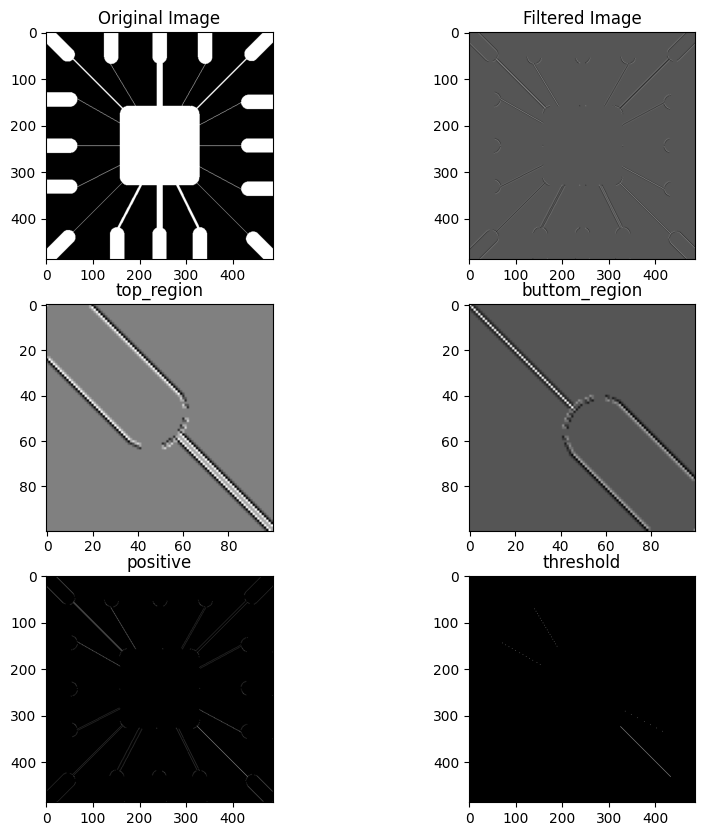

1530.0

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('Fig1005(a)(wirebond_mask).tif',0)
kernel=np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
filtered=laplacian(img,kernel)
filterr=filtered-filtered.min()
filtered_img=(filterr/filterr.max())*255

top_left_region = filtered_img[:100, :100]
button_right_region = filtered_img[-100:,-100 :]
positive = np.where(filtered<0,0,filtered)
positive1=positive-positive.min()
positive_img=(positive1/positive1.max()*255).astype('uint8')
T=254
threshold_img=np.where(positive_img>T,255,0).astype('uint8')
fig,axs=plt.subplots(3,2,figsize=(10,10))
axs[0][0].imshow(img, cmap='gray')
axs[0][0].set_title("Original Image")
axs[0][1].imshow(filtered, cmap='gray')
axs[0][1].set_title("Filtered Image")
axs[1][0].imshow(top_left_region,cmap='gray')
axs[1][0].set_title('top_region')
axs[1][1].imshow(button_right_region,cmap='gray')
axs[1][1].set_title('buttom_region')
axs[2][0].imshow(positive,cmap='gray')
axs[2][0].set_title('positive')
axs[2][1].imshow(threshold_img,cmap='gray')
axs[2][1].set_title('threshold')

plt.show()
positive.max()

In [11]:
import numpy as np
import cv2

def gradient(img, kernel):
    row, col = img.shape[:2]
    r, c = kernel.shape[0] // 2, kernel.shape[1] // 2
    pad_img = np.pad(img, ((r, r), (c, c)), mode='constant', constant_values=0)
    grad_img = np.zeros(img.shape)
    for i in range(row):
        for j in range(col):
            roi = np.sum(kernel * pad_img[i:i+kernel.shape[0], j:j+kernel.shape[1]])
            grad_img[i, j] = roi
    return grad_img

# Read the image in grayscale
img1 = cv2.imread('Fig1016(a)(building_original).tif', 0)
img=(img1/np.max(img1)*255).astype('uint8')
# Sobel kernels
kernel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Compute the gradients using the Sobel kernels
sobel_x = gradient(img, kernel_x)
sobel_y = gradient(img, kernel_y)


mag_grad = np.sqrt(sobel_x**2 + sobel_y**2)
gradient_ang = np.arctan2(sobel_y, sobel_x)

gradient_angl = (gradient_ang - gradient_ang.min())
gradient_angle = (gradient_angl / gradient_angl.max()) * 255


sobel_x = np.abs(sobel_x).astype('uint8')
sobel_y = np.abs(sobel_y).astype('uint8')
mag_gradient =np.abs(mag_grad).astype('uint8')
gradient_angle =gradient_angle.astype('uint8')


cv2.imshow('Original Image', img)
cv2.imshow('Sobel X', sobel_x)
cv2.imshow('Sobel Y', sobel_y)
cv2.imshow('Magnitude of Gradient', mag_gradient)
cv2.imshow('Gradient Angle', gradient_angle)
cv2.waitKey(0)
cv2.destroyAllWindows()
gradient_angle.max()

255

In [12]:
import numpy as np
import cv2 
def smoothing(img,kernel):
    row,col=img.shape[:2]
    r, c = kernel.shape[0] // 2, kernel.shape[1] // 2
    pad_img = np.pad(img, ((r, r), (c, c)), mode='constant', constant_values=0)
    smooth_img = np.zeros(img.shape)
    for i in range(row):
        for j in range(col):
            roi = (np.sum(kernel * pad_img[i:i+kernel.shape[0], j:j+kernel.shape[1]]))/(kernel.shape[0]*kernel.shape[1])
            smooth_img[i, j] = roi
    return smooth_img
img=cv2.imread('Fig1016(a)(building_original).tif',0)
kernel=np.ones((5,5)).astype('uint8')
smoothed_img=smoothing(img,kernel).astype('uint8')
kernel_x=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
kernel_y=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_x = gradient(smoothed_img, kernel_x)
sobel_y = gradient(smoothed_img, kernel_y)
mag_grad = np.sqrt(sobel_x**2 + sobel_y**2)

sobel_x = np.abs(sobel_x).astype('uint8')
sobel_y = np.abs(sobel_y).astype('uint8')
smoothed_mag_grad =np.abs(mag_grad).astype('uint8')
cv2.imshow('img',smoothed_img)
cv2.imshow('sobel_x',sobel_x)
cv2.imshow('sobel_y',sobel_y)
cv2.imshow('magnitude of gradient',smoothed_mag_grad)
#cv2.imshow('gradient_angle',gradient_angle)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [22]:

nw_kirsch_kernel = np.array([
    [-3,5,5],
    [-3,0,5],
    [-3,-3,-3]
])

sw_kirsch_kernel = np.array([
    [5,5,-3],
    [5,0,-3],
    [-3,-3,-3]
])

nw_gradient_image = np.abs(gradient(smoothed_img,nw_kirsch_kernel)).astype('uint8')
sw_gradient_image = np.abs(gradient(smoothed_img,sw_kirsch_kernel)).astype('uint8')
cv2.imshow('nw_grad',nw_gradient_image)
cv2.imshow('sw_grad',sw_gradient_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
threshold=0.33*np.max(mag_gradient)
threshold_smooth=0.33*np.max(smoothed_mag_grad)
seg_img=np.where(mag_grad>=threshold,255,0).astype('uint8')
seg_smoothed=np.where(smoothed_mag_grad>=threshold_smooth,255,0).astype('uint8')
cv2.imshow('seg_img',seg_img)
cv2.imshow('seg_smoothed_img',seg_smoothed)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
import cv2
import numpy as np
img = cv2.imread("Fig1005(a)(wirebond_mask).tif",0)
cv2.imshow("image",img)
kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
img = cv2.filter2D(img,-1,kernel)
cv2.imshow("detected_line",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
#vertical line detection.
import cv2
import numpy as np
img = cv2.imread("Fig1005(a)(wirebond_mask).tif",0)
#kernel to be used to detect verticale lines
kernel = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
img = cv2.filter2D(img,-1,kernel)
cv2.imshow("detected_line",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
#horizontal line detection
import cv2
import numpy as np
img = cv2.imread("Fig1005(a)(wirebond_mask).tif",0)
#kernel to detect horizental lines
kernel = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
img = cv2.filter2D(img,-1,kernel)
cv2.imshow("detected_line",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
#45 degree line detection
import cv2
import numpy as np
img = cv2.imread("Fig1005(a)(wirebond_mask).tif",0)
#kernel to detect horizental lines
kernel = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
img = cv2.filter2D(img,-1,kernel)
cv2.imshow("detected_line",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
#-45 degree line detection
#horizontal line detection
import cv2
import numpy as np
img = cv2.imread("Fig1005(a)(wirebond_mask).tif",0)
#kernel to detect horizental lines
kernel = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])
img = cv2.filter2D(img,-1,kernel)
cv2.imshow("detected_line",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
#edge detection using sobel operators
import cv2
import numpy as np
img = cv2.imread("Fig1022(a)(building_original).tif",0)
img = img/255
cv2.imshow("image",img)
kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
img_gx = cv2.filter2D(img,-1,kernel)
cv2.imshow("g_x derivative",img_gx)
img_gy = cv2.filter2D(img,-1,kernel.T)
cv2.imshow("g_y derivative",img_gy)
gx_gy = img_gx + img_gy
cv2.imshow("gx_gy",gx_gy)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/3c/a5/54a497ca4af8e76adfe7c5a1712f3bb6b2222d464fe736b60aaafd425945/matplotlib-3.9.1-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.9.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/d6/4f/76d0dd0bca417691918484c26c74dd9dd44fbf528bbfeb30d754886e2c54/contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.9.1-cp311-cp311-win_amd64.whl (8.0 MB)
Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl (188 kB)
Using cached cycler-


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


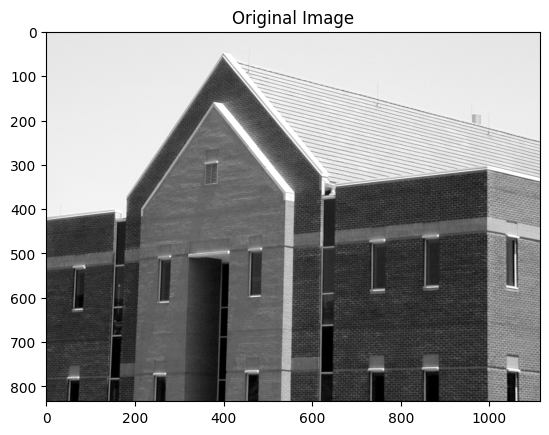

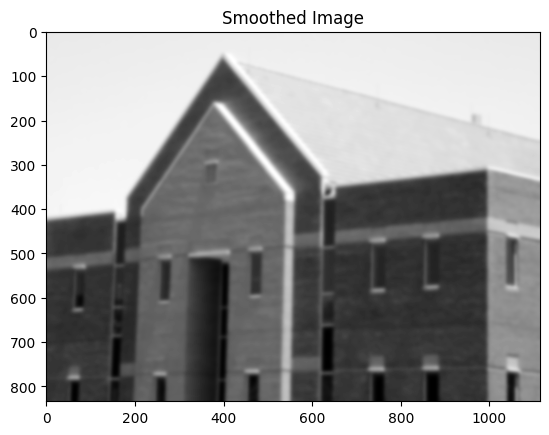

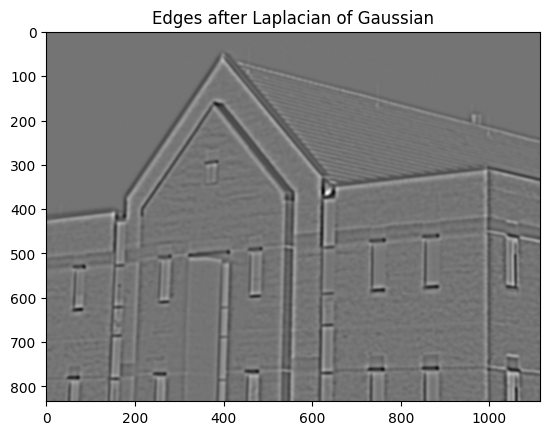

0.07224590443800649


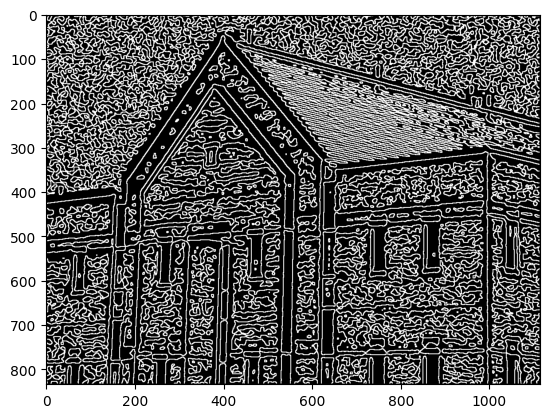

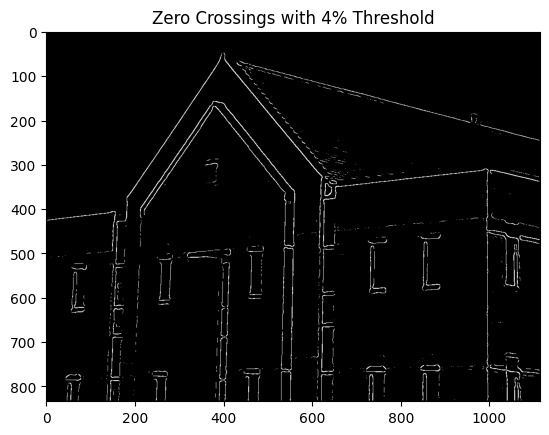

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def laplacian_cv2(image, kernel):
    return cv2.filter2D(image, -1, kernel)

# Load the image in grayscale
img = cv2.imread('Fig1022(a)(building_original).tif', 0)

# Normalize the image to [0, 1]
img = img / 255.0

# Display the original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

# Parameters for Gaussian smoothing
filter_size = 25
sigma = 4

# Create Gaussian kernel
kernel = np.zeros((filter_size, filter_size), dtype=np.float32)
pad = filter_size // 2

for i in range(filter_size):
    for j in range(filter_size):
        x = i - pad
        y = j - pad
        kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))

# Normalize the kernel
kernel /= np.sum(kernel)

# Apply Gaussian smoothing
smoothed_img = cv2.filter2D(img, -1, kernel)

# Display the smoothed image
plt.imshow(smoothed_img, cmap='gray')
plt.title('Smoothed Image')
plt.show()

# Laplacian kernel for edge detection
laplacian_kernel = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1, 1, 1]])

# Apply Laplacian edge detection using the user-defined function
laplacian_image = laplacian_cv2(smoothed_img, laplacian_kernel)

# Normalize the Laplacian image to [0, 1] for display purposes
laplacian_image_normalized = (laplacian_image - np.min(laplacian_image)) / (np.max(laplacian_image) - np.min(laplacian_image))

# Display the Laplacian edge detection result
plt.imshow(laplacian_image_normalized, cmap='gray')
plt.title('Edges after Laplacian of Gaussian')
plt.show()

print(laplacian_image.max())

zero_crossings_0 = np.zeros_like(laplacian_image)

rows, cols = laplacian_image.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        patch = laplacian_image[i-1:i+2, j-1:j+2]
        if np.max(patch) > 0 and np.min(patch) < 0:
            zero_crossings_0[i, j] = 255
plt.imshow(zero_crossings_0,cmap='gray')
plt.show()
threshold = 0.04 * np.max(laplacian_image)
zero_crossings_4_perc_thr = np.zeros_like(laplacian_image)

for i in range(1, rows-1):
    for j in range(1, cols-1):
        patch = laplacian_image[i-1:i+2, j-1:j+2]
        if np.max(patch) > threshold and np.min(patch) < -threshold:
            zero_crossings_4_perc_thr[i, j] = 255

plt.imshow(zero_crossings_4_perc_thr, cmap='gray')
plt.title('Zero Crossings with 4% Threshold')
plt.show()

In [7]:
import cv2
import numpy as np
img=cv2.imread('Fig1026(a)(headCT-Vandy).tif',0)
img=img/255
smoothed_img=cv2.blur(img,(5,5))
kernel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_x = gradient(smoothed_img, kernel_x)
sobel_y = gradient(smoothed_img, kernel_y)
mag_grad = np.sqrt(sobel_x**2 + sobel_y**2)
threshold=0.15*np.max(mag_grad)
threshold_img=np.where(mag_grad>threshold,255,0).astype('uint8')

def Marr_Hildreth(img):
    blurred = cv2.GaussianBlur(img, (19, 19), 3)
    
    # Apply the Laplacian operator
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    return laplacian
    
def canny_method(image):
    # Apply Gaussian Blur with sigma = 2 and kernel size 13x13
    blurred = cv2.GaussianBlur(img, (13, 13), 2)
    
    # Apply the Canny edge detector
    edges = cv2.Canny((blurred * 255).astype(np.uint8), int(0.5 * 255), int(0.15 * 255))
    
    return edges 

canny_edges = canny_method(img)    
marr_hildreth=Marr_Hildreth(img)
threshold=0.002*np.max(marr_hildreth)
zero_crossings_4_perc_thr = np.zeros_like(marr_hildreth)
rows,cols=zero_crossings_4_perc_thr.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        patch = marr_hildreth[i-1:i+2, j-1:j+2]
        if np.max(patch) > threshold and np.min(patch) < -threshold:
            zero_crossings_4_perc_thr[i, j]=255

cv2.imshow('original_img',img)
cv2.imshow('mag_grad',mag_grad)
cv2.imshow('threshold',threshold_img)
cv2.imshow('mar_hildreth',zero_crossings_4_perc_thr)
cv2.imshow('canny',canny_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [15]:
import cv2
import numpy as np
img=cv2.imread('Fig1022(a)(building_original).tif',0)
img=img/255
kernel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_x = gradient(img, kernel_x)
sobel_y = gradient(img, kernel_y)
mag_grad = np.sqrt(sobel_x**2 + sobel_y**2)

threshold=0.33*np.max(mag_grad)
threshold_img=np.where(mag_grad>threshold,255,0).astype('uint8')

def Marr_Hildreth(img):
   

# Parameters for Gaussian smoothing
    filter_size = 25
    sigma = 4

# Create Gaussian kernel
    kernel = np.zeros((filter_size, filter_size), dtype=np.float32)
    pad = filter_size // 2

    for i in range(filter_size):
        for j in range(filter_size):
            x = i - pad
            y = j - pad
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))

# Normalize the kernel
    kernel /= np.sum(kernel)

# Apply Gaussian smoothing
    smoothed_img = cv2.filter2D(img, -1, kernel)
    laplacian_kernel = np.array([[1, 1, 1],
                             [1, -8, 1],
                             [1, 1, 1]])

# Apply Laplacian edge detection using the user-defined function
    laplacian_image = laplacian_cv2(smoothed_img, laplacian_kernel)

# Normalize the Laplacian image to [0, 1] for display purposes
    return laplacian_image

def canny_method(image):
    # Apply Gaussian Blur with sigma = 2 and kernel size 13x13
    blurred = cv2.GaussianBlur(img, (13, 13), 2)
    
    # Apply the Canny edge detector
    edges = cv2.Canny((blurred * 255).astype(np.uint8), int(0.5 * 255), int(0.15 * 255))
    
    return edges 

canny_edges = canny_method(img)    
marr_hildreth=Marr_Hildreth(img)
threshold=0.04*np.max(marr_hildreth)
zero_crossings_4_perc_thr = np.zeros_like(marr_hildreth).astype(np.float32)
rows,cols=zero_crossings_4_perc_thr.shape
for i in range(1, rows-1):
    for j in range(1, cols-1):
        patch = marr_hildreth[i-1:i+2, j-1:j+2]
        if np.max(patch) > threshold and np.min(patch) < -threshold:
            zero_crossings_4_perc_thr[i, j]=255

cv2.imshow('original_img',img)
cv2.imshow('threshold',threshold_img)
cv2.imshow('smoothed_grad',mag_grad)
cv2.imshow('mar_hildreth',zero_crossings_4_perc_thr)
cv2.imshow('canny',canny_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()



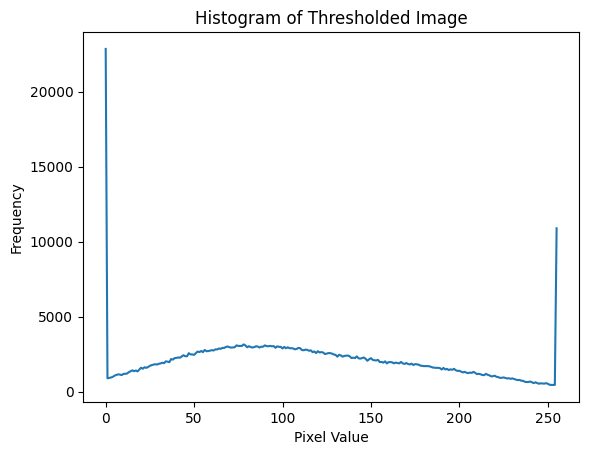

125.0


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv2.imread('Fig1038(a)(noisy_fingerprint).tif', 0)

# Calculate the threshold value

thresh_val, img_ = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
# Display the original image
cv2.imshow('Original Image', img)

# Display the thresholded image
cv2.imshow('Thresholded Image', threshold_img)

# Wait until a key is pressed
cv2.waitKey(0)

# Destroy all windows
cv2.destroyAllWindows()

# Plot the histogram
plt.plot(hist)
plt.title('Histogram of Thresholded Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
print(thresh_val)

In [23]:
import numpy as np
import cv2
img=cv2.imread('Fig1039(a)(polymersomes).tif',0)
thre=np.mean(img)
threshold=np.where(img>thre,255,0).astype('uint8')
thresh_val, img_ = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
cv2.imshow('img',img)
cv2.imshow('threshold',img_)
cv2.imshow('tds',threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()


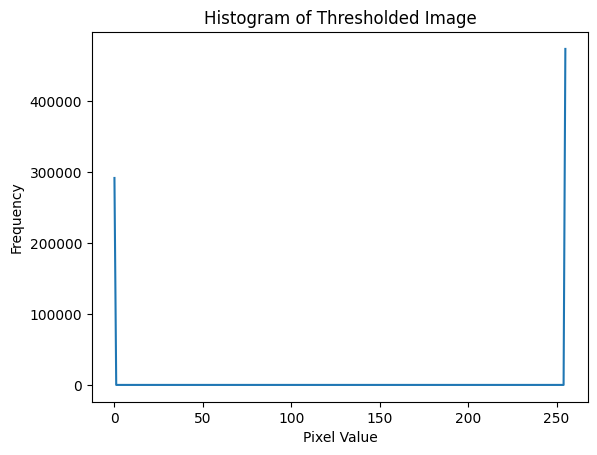

Final threshold value: 125.64968454931093


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('Fig1038(a)(noisy_fingerprint).tif', 0)


T = np.mean(img)


delta_T = 0.5

while True:
   
    G1 = img[img > T]
    G2 = img[img <= T]
    
    
    m1 = np.mean(G1) if len(G1) > 0 else 0
    m2 = np.mean(G2) if len(G2) > 0 else 0
    
   
    new_T = (m1 + m2) / 2
    
   
    if abs(new_T - T) < delta_T:
        break
    

    T = new_T


threshold_img = np.where(img > T, 255, 0).astype('uint8')


hist = cv2.calcHist([threshold_img], [0], None, [256], [0, 256])


cv2.imshow('Original Image', img)
cv2.imshow('Thresholded Image', threshold_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


plt.plot(hist)
plt.title('Histogram of Thresholded Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

print(f"Final threshold value: {T}")


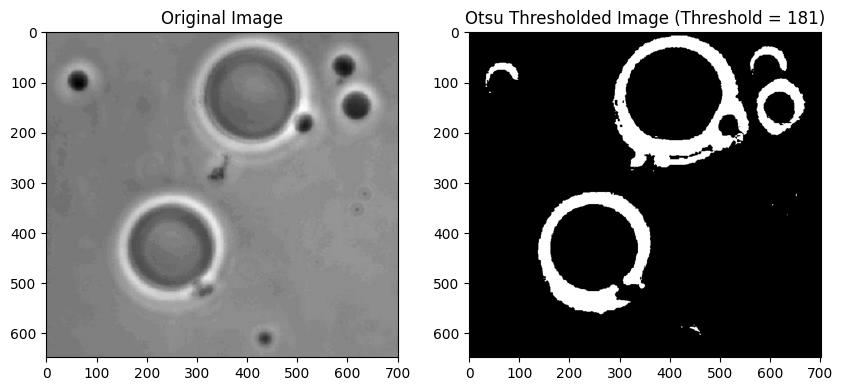

Optimal Threshold: 181
Separability Measure: 0.46622919501901644


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('Fig1039(a)(polymersomes).tif',0)
T = np.mean(img)


delta_T = 0.5

while True:
   
    G1 = img[img > T]
    G2 = img[img <= T]
    
    
    m1 = np.mean(G1) if len(G1) > 0 else 0
    m2 = np.mean(G2) if len(G2) > 0 else 0
    
   
    new_T = (m1 + m2) / 2
    
   
    if abs(new_T - T) < delta_T:
        break
    

    T = new_T


threshold_img = np.where(img > T, 255, 0).astype('uint8')
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

cv2.imshow('img',img)
cv2.imshow('Thresholded Image', threshold_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Compute the histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Normalize the histogram
hist_norm = hist / hist.sum()

# Compute cumulative sums
cumulative_sum = np.cumsum(hist_norm)

# Compute cumulative means
cumulative_mean = np.cumsum(hist_norm * np.arange(256))

# Compute global mean
global_mean = cumulative_mean[-1]

# Compute between-class variance
between_class_variance = np.zeros(256)

# Compute between-class variance, avoiding division by zero
for k in range(256):
    if cumulative_sum[k] == 0 or cumulative_sum[k] == 1:
        between_class_variance[k] = 0
    else:
        between_class_variance[k] = (global_mean * cumulative_sum[k] - cumulative_mean[k]) ** 2 / (cumulative_sum[k] * (1 - cumulative_sum[k]))

# Find the threshold that maximizes the between-class variance
optimal_threshold = np.argmax(between_class_variance)

# Compute global variance
global_variance = np.var(img)

# Compute separability measure
separability = between_class_variance[optimal_threshold] / global_variance

# Apply the threshold to the image
_, otsu_image = cv2.threshold(img, optimal_threshold, 255, cv2.THRESH_BINARY)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(otsu_image, cmap='gray')
plt.title(f'Otsu Thresholded Image (Threshold = {optimal_threshold})')
plt.show()

print(f'Optimal Threshold: {optimal_threshold}')
print(f'Separability Measure: {separability}')





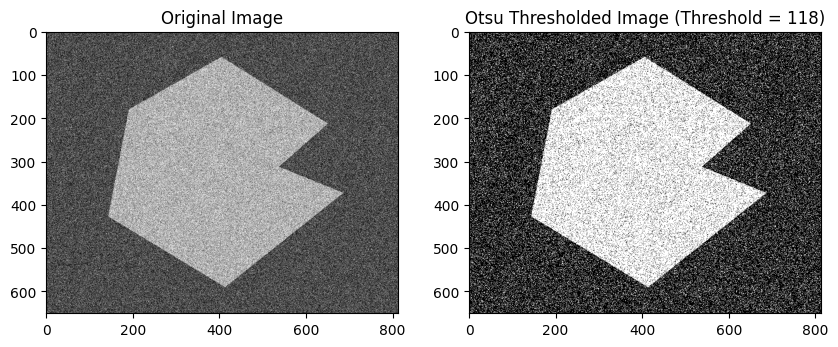

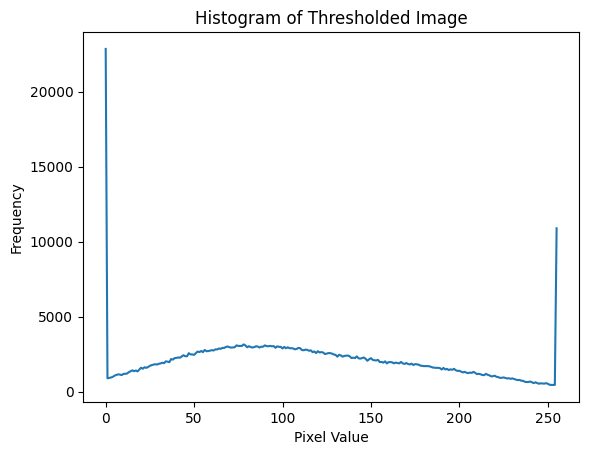

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('Fig1040(a)(large_septagon_gaussian_noise_mean_0_std_50_added).tif',0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist, bins = np.histogram(img.flatten(), 256, [0, 256])


hist_norm = hist / hist.sum()


cumulative_sum = np.cumsum(hist_norm)


cumulative_mean = np.cumsum(hist_norm * np.arange(256))


global_mean = cumulative_mean[-1]


between_class_variance = np.zeros(256)


for k in range(256):
    if cumulative_sum[k] == 0 or cumulative_sum[k] == 1:
        between_class_variance[k] = 0
    else:
        between_class_variance[k] = (global_mean * cumulative_sum[k] - cumulative_mean[k]) ** 2 / (cumulative_sum[k] * (1 - cumulative_sum[k]))

optimal_threshold = np.argmax(between_class_variance)


global_variance = np.var(img)


separability = between_class_variance[optimal_threshold] / global_variance


_, otsu_image = cv2.threshold(img, optimal_threshold, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(otsu_image, cmap='gray')
plt.title(f'Otsu Thresholded Image (Threshold = {optimal_threshold})')
plt.show()
plt.plot(hist)
plt.title('Histogram of Thresholded Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()
plt.plot(hist)
plt.title('Histogram of  Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


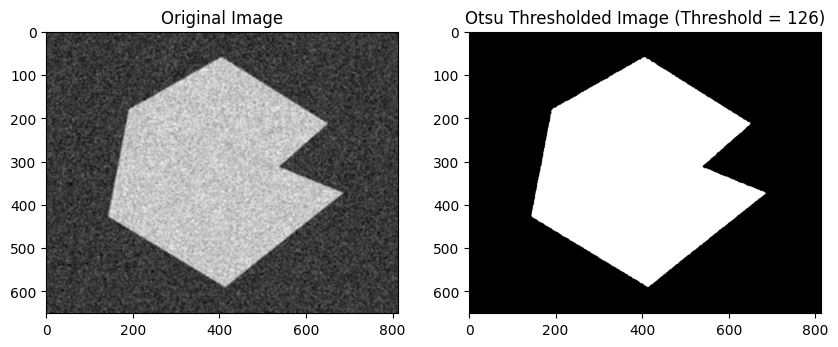

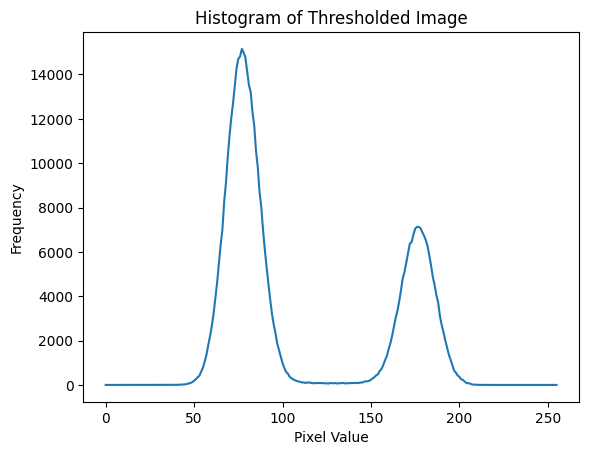

In [11]:
blured_img=cv2.blur(img,(5,5))
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist, bins = np.histogram(blured_img.flatten(), 256, [0, 256])


hist_norm = hist / hist.sum()


cumulative_sum = np.cumsum(hist_norm)


cumulative_mean = np.cumsum(hist_norm * np.arange(256))

global_mean = cumulative_mean[-1]


between_class_variance = np.zeros(256)


for k in range(256):
    if cumulative_sum[k] == 0 or cumulative_sum[k] == 1:
        between_class_variance[k] = 0
    else:
        between_class_variance[k] = (global_mean * cumulative_sum[k] - cumulative_mean[k]) ** 2 / (cumulative_sum[k] * (1 - cumulative_sum[k]))


optimal_threshold = np.argmax(between_class_variance)


global_variance = np.var(blured_img)


separability = between_class_variance[optimal_threshold] / global_variance


_, otsu_image = cv2.threshold(blured_img, optimal_threshold, 255, cv2.THRESH_BINARY)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blured_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(otsu_image, cmap='gray')
plt.title(f'Otsu Thresholded Image (Threshold = {optimal_threshold})')
plt.show()
plt.plot(hist)
plt.title('Histogram of blured Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

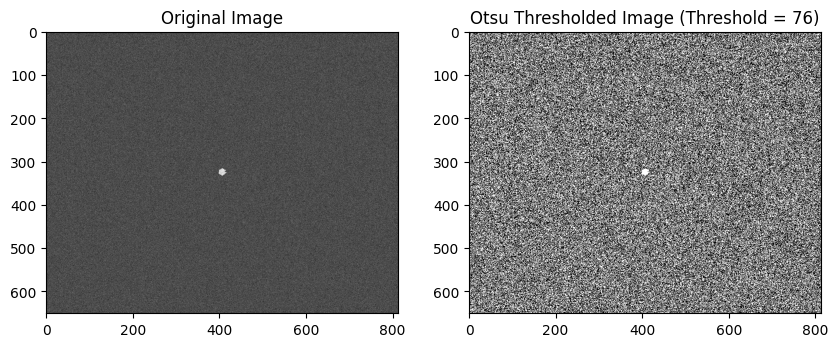

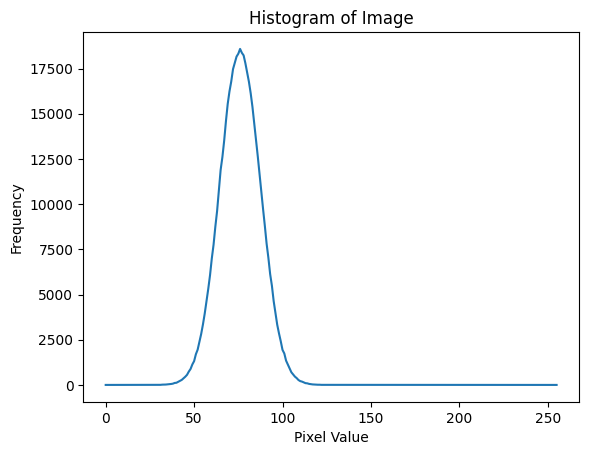

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('Fig1041(a)(septagon_small_noisy_mean_0_stdv_10).tif',0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist, bins = np.histogram(img.flatten(), 256, [0, 256])


hist_norm = hist / hist.sum()


cumulative_sum = np.cumsum(hist_norm)


cumulative_mean = np.cumsum(hist_norm * np.arange(256))


global_mean = cumulative_mean[-1]


between_class_variance = np.zeros(256)


for k in range(256):
    if cumulative_sum[k] == 0 or cumulative_sum[k] == 1:
        between_class_variance[k] = 0
    else:
        between_class_variance[k] = (global_mean * cumulative_sum[k] - cumulative_mean[k]) ** 2 / (cumulative_sum[k] * (1 - cumulative_sum[k]))

optimal_threshold = np.argmax(between_class_variance)


global_variance = np.var(img)


separability = between_class_variance[optimal_threshold] / global_variance


_, otsu_image = cv2.threshold(img, optimal_threshold, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(otsu_image, cmap='gray')
plt.title(f'Otsu Thresholded Image (Threshold = {optimal_threshold})')
plt.show()
plt.plot(hist)
plt.title('Histogram of Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()



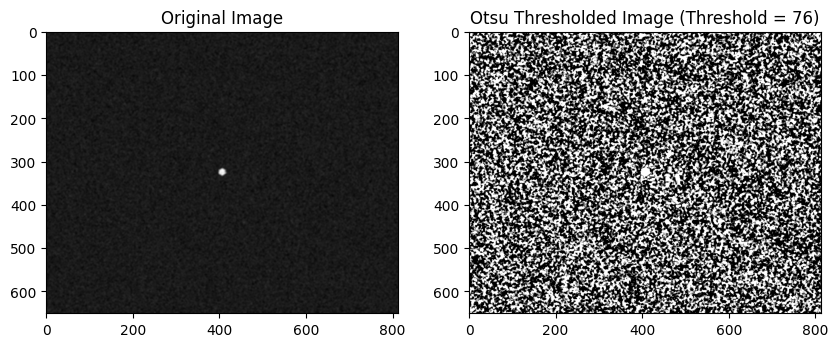

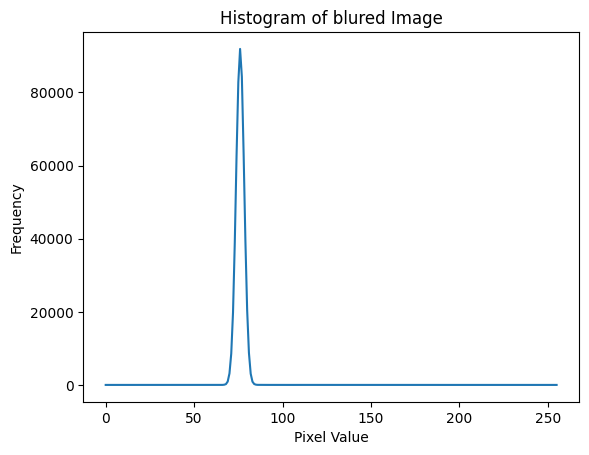

In [4]:
blured_img=cv2.blur(img,(5,5))
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist, bins = np.histogram(blured_img.flatten(), 256, [0, 256])


hist_norm = hist / hist.sum()


cumulative_sum = np.cumsum(hist_norm)


cumulative_mean = np.cumsum(hist_norm * np.arange(256))

global_mean = cumulative_mean[-1]


between_class_variance = np.zeros(256)


for k in range(256):
    if cumulative_sum[k] == 0 or cumulative_sum[k] == 1:
        between_class_variance[k] = 0
    else:
        between_class_variance[k] = (global_mean * cumulative_sum[k] - cumulative_mean[k]) ** 2 / (cumulative_sum[k] * (1 - cumulative_sum[k]))


optimal_threshold = np.argmax(between_class_variance)


global_variance = np.var(blured_img)


separability = between_class_variance[optimal_threshold] / global_variance


_, otsu_image = cv2.threshold(blured_img, optimal_threshold, 255, cv2.THRESH_BINARY)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blured_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(otsu_image, cmap='gray')
plt.title(f'Otsu Thresholded Image (Threshold = {optimal_threshold})')
plt.show()
plt.plot(hist)
plt.title('Histogram of blured Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

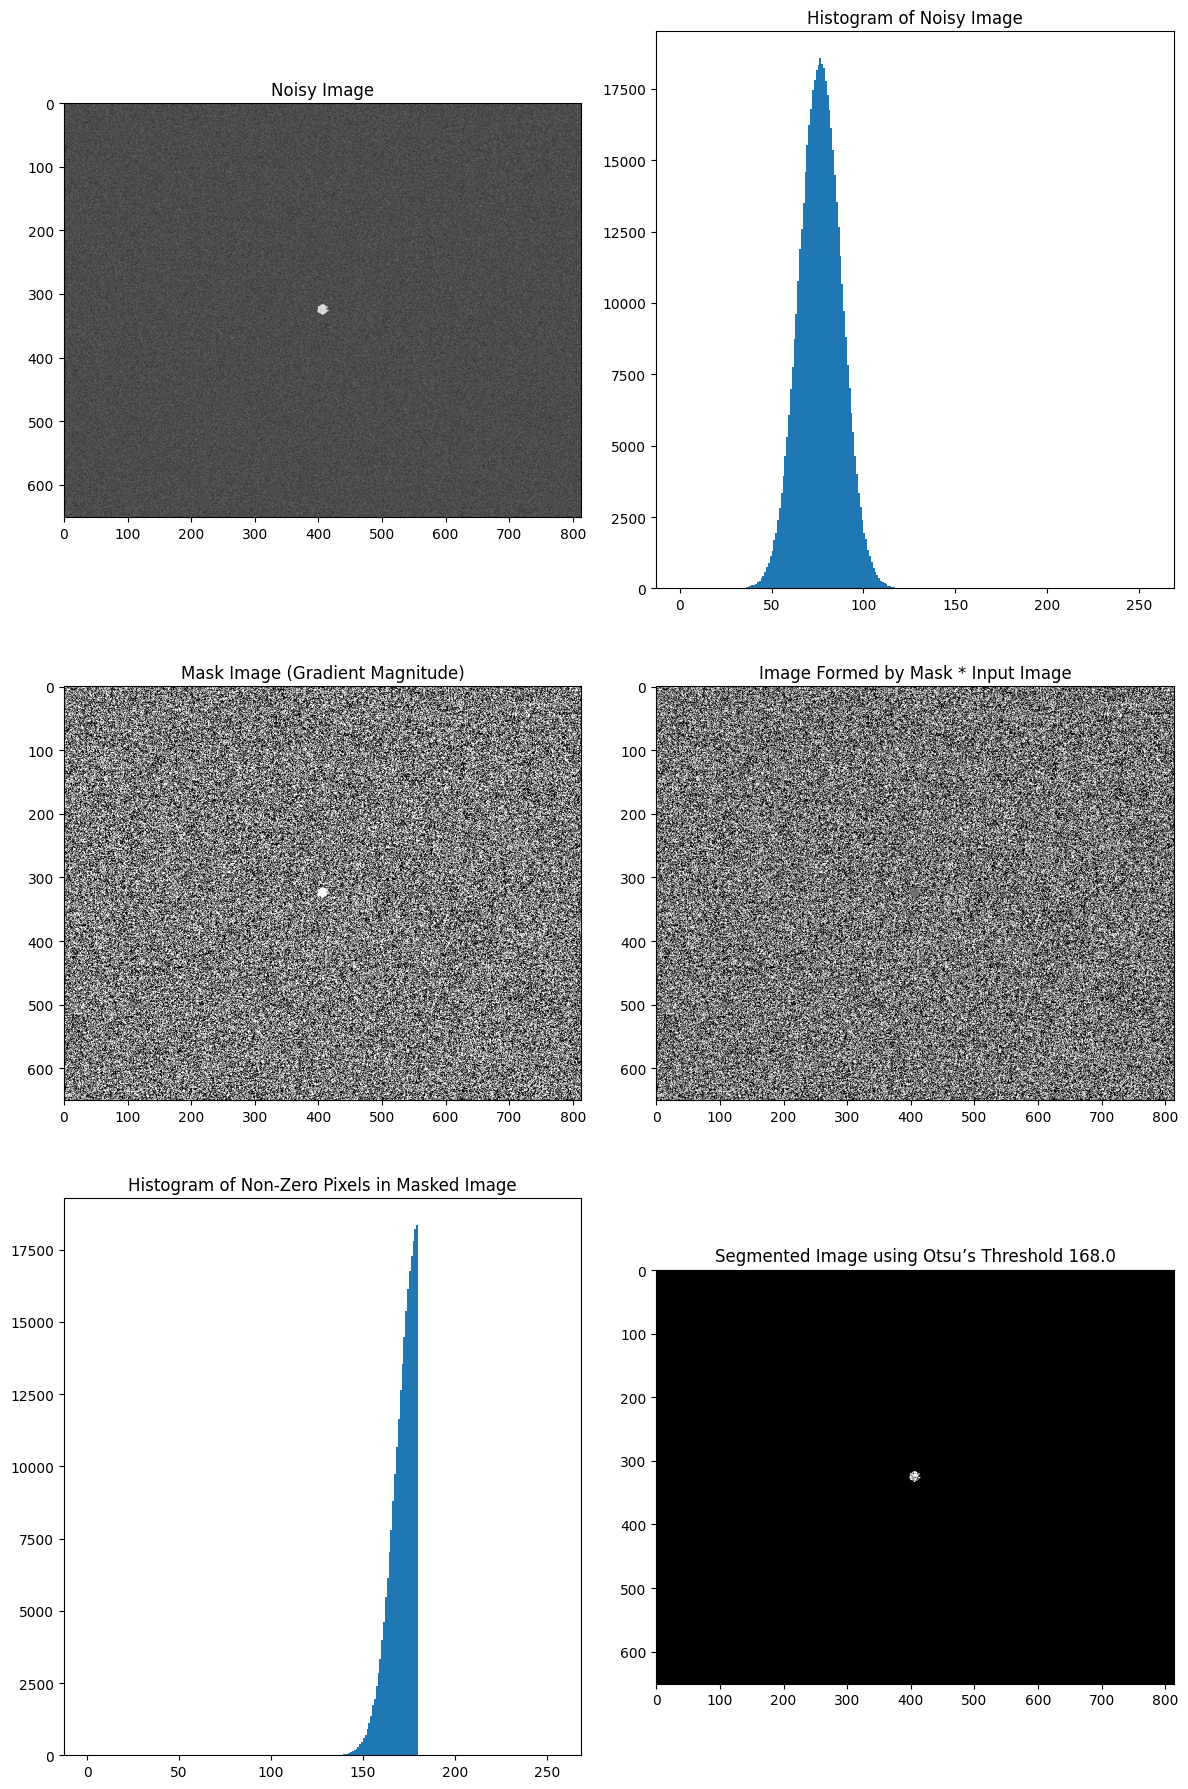

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('Fig1041(a)(septagon_small_noisy_mean_0_stdv_10).tif', 0)  # Replace 'noisy_image_path' with your image file path

_, mask = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


masked_image = image * mask


nonzero_pixels = masked_image[masked_image > 0]
histogram, bins = np.histogram(nonzero_pixels, bins=256, range=(0, 256))


threshold_value, _ = cv2.threshold(nonzero_pixels.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, segmented_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)


fig, axs = plt.subplots(3, 2, figsize=(12, 18))


axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Noisy Image')


axs[0, 1].hist(image.ravel(), bins=256, range=(0, 256))
axs[0, 1].set_title('Histogram of Noisy Image')

#
axs[1, 0].imshow(mask, cmap='gray')
axs[1, 0].set_title('Mask Image (Gradient Magnitude)')


axs[1, 1].imshow(masked_image, cmap='gray')
axs[1, 1].set_title('Image Formed by Mask * Input Image')


axs[2, 0].hist(nonzero_pixels, bins=256, range=(0, 256))
axs[2, 0].set_title('Histogram of Non-Zero Pixels in Masked Image')


axs[2, 1].imshow(segmented_image, cmap='gray')
axs[2, 1].set_title(f'Segmented Image using Otsu’s Threshold {threshold_value}')

plt.tight_layout()
plt.show()


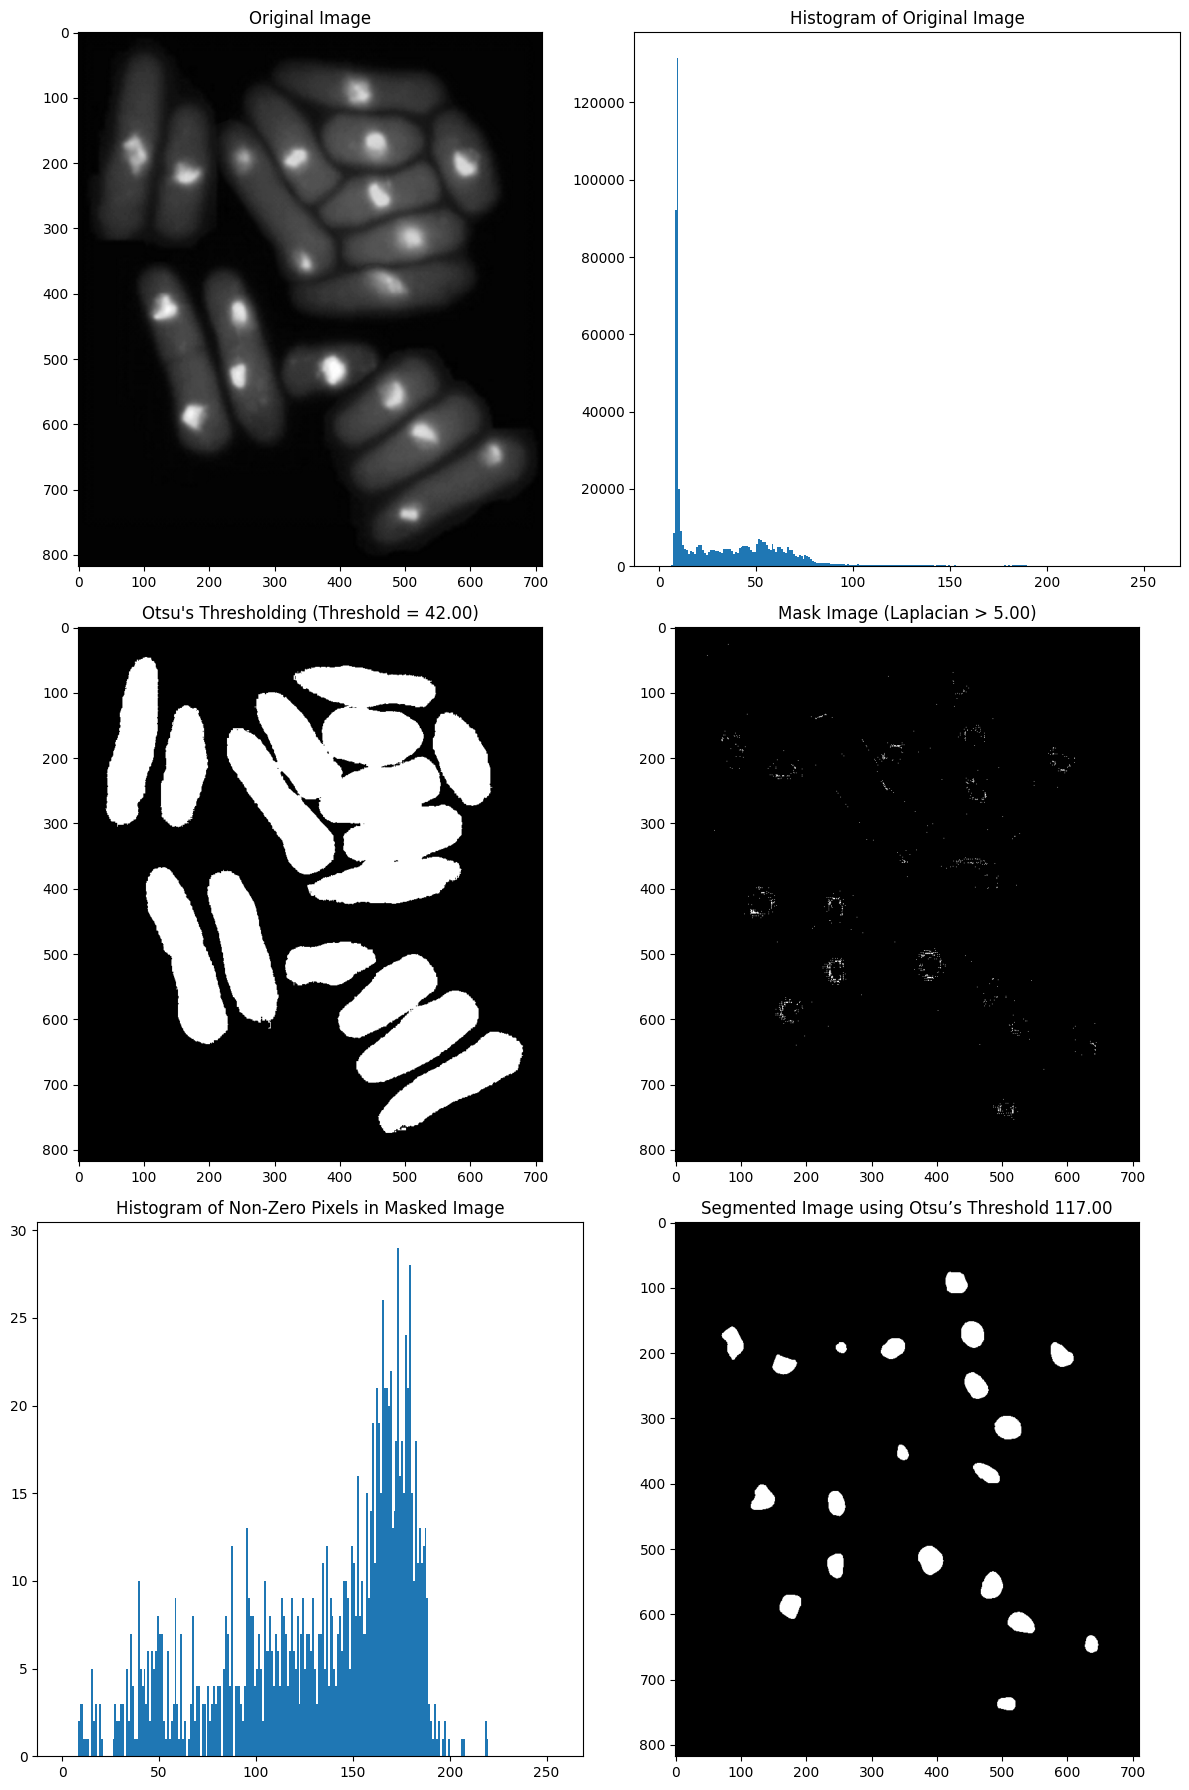

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('Fig1043(a)(yeast_USC).tif', 0)  # Replace with your image file path


laplacian = cv2.Laplacian(image, cv2.CV_64F)
abs_laplacian = np.abs(laplacian)


percentile_value = np.percentile(abs_laplacian, 99.5)
_, mask = cv2.threshold(abs_laplacian, percentile_value, 255, cv2.THRESH_BINARY)


masked_image = cv2.bitwise_and(image, image, mask=mask.astype(np.uint8))


nonzero_pixels = masked_image[masked_image > 0]
histogram, bins = np.histogram(nonzero_pixels, bins=256, range=(0, 256))


threshold_value, _ = cv2.threshold(nonzero_pixels.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


_, segmented_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)


fig, axs = plt.subplots(3, 2, figsize=(12, 18))


axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')


axs[0, 1].hist(image.ravel(), bins=256, range=(0, 256))
axs[0, 1].set_title('Histogram of Original Image')


_, otsu_thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
axs[1, 0].imshow(otsu_thresholded_image, cmap='gray')
axs[1, 0].set_title(f'Otsu\'s Thresholding (Threshold = {_:.2f})')


axs[1, 1].imshow(mask, cmap='gray')
axs[1, 1].set_title(f'Mask Image (Laplacian > {percentile_value:.2f})')


axs[2, 0].hist(nonzero_pixels, bins=256, range=(0, 256))
axs[2, 0].set_title('Histogram of Non-Zero Pixels in Masked Image')


axs[2, 1].imshow(segmented_image, cmap='gray')
axs[2, 1].set_title(f'Segmented Image using Otsu’s Threshold {threshold_value:.2f}')

plt.tight_layout()
plt.show()


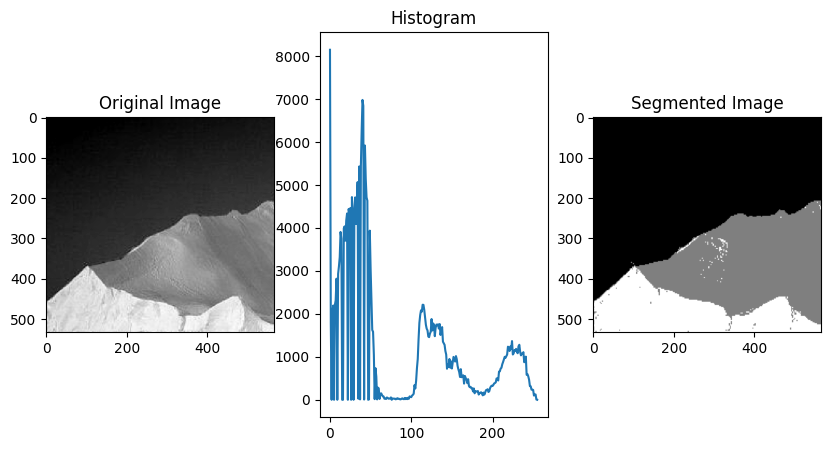

Optimal thresholds: t1 = 81, t2 = 178


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image in grayscale mode
image = cv2.imread('Fig1045(a)(iceberg).tif', 0)

# Step 2: Calculate the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
hist = hist.ravel()  # Flatten the histogram

# Step 3: Find the optimal thresholds
def find_optimal_thresholds(hist):
    total = np.sum(hist)
    current_max = 0
    threshold1 = 0
    threshold2 = 0
    
    for t1 in range(1, 255):
        for t2 in range(t1 + 1, 256):
            w0 = np.sum(hist[:t1])
            w1 = np.sum(hist[t1:t2])
            w2 = np.sum(hist[t2:])
            
            if w0 == 0 or w1 == 0 or w2 == 0:
                continue
            
            m0 = np.sum(np.arange(0, t1) * hist[:t1]) / w0
            m1 = np.sum(np.arange(t1, t2) * hist[t1:t2]) / w1
            m2 = np.sum(np.arange(t2, 256) * hist[t2:]) / w2
            mG = (w0 * m0 + w1 * m1 + w2 * m2) / total
            
            between_class_variance = w0 * (m0 - mG)**2 + w1 * (m1 - mG)**2 + w2 * (m2 - mG)**2
            
            if between_class_variance > current_max:
                current_max = between_class_variance
                threshold1 = t1
                threshold2 = t2
    
    return threshold1, threshold2

# Get the optimal thresholds
t1, t2 = find_optimal_thresholds(hist)

# Step 4: Segment the image using the thresholds
segmented_image = np.zeros_like(image)
segmented_image[(image > t1) & (image <= t2)] = 127
segmented_image[image > t2] = 255

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Histogram')
plt.plot(hist)

plt.subplot(1, 3, 3)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')

plt.show()

print(f"Optimal thresholds: t1 = {t1}, t2 = {t2}")


In [1]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('yeast_cells_image.jpg', cv2.IMREAD_GRAYSCALE)

# Convert image to floating point format
image_float = np.float32(image)

# Define parameters
neighborhood_size = 3  # size of the neighborhood for computing local mean and std

# Calculate local mean and standard deviation
local_mean = cv2.blur(image_float, (neighborhood_size, neighborhood_size))
local_squared_mean = cv2.blur(image_float ** 2, (neighborhood_size, neighborhood_size))
local_std = cv2.sqrt(local_squared_mean - local_mean ** 2)

# Define constants for thresholding
a = 30
b = 1.5

# Calculate variable threshold
variable_threshold = a * local_mean + b * local_std

# Threshold the image
binary_image = (image_float > variable_threshold).astype(np.uint8) * 255

# Display the results
cv2.imshow('Original Image', image)
cv2.imshow('Binary Image (Variable Thresholding)', binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'blur'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
